In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
import seaborn as sn
from sklearn import metrics
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Data\inegi.csv')

In [4]:
df.head(5)

,folioviv,tipo_viv,mat_pared,mat_techos,mat_pisos,antiguedad,antigua_ne,cocina,cocina_dor,cuart_dorm,...,tot_hom,tot_muj,tot_hog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,procaptar
0,100013601,1,8,10,3,42,,1,2,4,...,2,1,1,1001,1,3,2,1,175,0
1,100013602,1,8,10,3,40,,1,2,5,...,2,3,1,1001,1,3,2,1,175,0
2,100013603,1,8,10,3,50,,1,2,2,...,1,1,1,1001,1,3,2,1,175,0
3,100013604,1,8,10,3,45,,1,2,2,...,1,1,1,1001,1,3,2,1,175,0
4,100013606,1,8,10,3,40,,1,2,3,...,1,3,1,1001,1,3,2,1,175,0


In [5]:
# Buscamos por entradas vacías en las colunas 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73405 entries, 0 to 73404
Data columns (total 64 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   folioviv     73405 non-null  int64 
 1   tipo_viv     73405 non-null  object
 2   mat_pared    73405 non-null  int64 
 3   mat_techos   73405 non-null  int64 
 4   mat_pisos    73405 non-null  object
 5   antiguedad   73405 non-null  object
 6   antigua_ne   73405 non-null  object
 7   cocina       73405 non-null  int64 
 8   cocina_dor   73405 non-null  object
 9   cuart_dorm   73405 non-null  int64 
 10  num_cuarto   73405 non-null  int64 
 11  disp_agua    73405 non-null  int64 
 12  dotac_agua   73405 non-null  object
 13  excusado     73405 non-null  int64 
 14  uso_compar   73405 non-null  object
 15  sanit_agua   73405 non-null  object
 16  biodigest    73405 non-null  object
 17  bano_comp    73405 non-null  object
 18  bano_excus   73405 non-null  object
 19  bano_regad   73405 non-nu

Como no encontramos ninguna fila vacía, la discriminación de columnas la hicimos con base en el diccionario de datos otorgado por la INEGI, en donde expresaban la información otorgada por cada columna, y por simple lógica, eliminamos manualmente todas aquellas que no aportaban nada a la intención final del algoritmo de clasificación.

In [6]:
# Elegimos las columnas que no nos sirven y se van a droppear:
drop = ['tipo_viv','folioviv','antiguedad','antigua_ne','biodigest','tenencia','pago_mesp','tipo_adqui','tipo_finan',
       'num_dueno1','hog_dueno2','num_dueno2','hog_dueno1','escrituras','est_dis','upm','factor','tot_hom',
       'tot_muj','est_dis','upm','factor','procaptar','ubica_geo']
# Elimino todas las columnas que no me sirven
df.drop(drop, axis=1,inplace=True)

In [7]:
# Visualizamos la información que proporciona cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73405 entries, 0 to 73404
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   mat_pared    73405 non-null  int64 
 1   mat_techos   73405 non-null  int64 
 2   mat_pisos    73405 non-null  object
 3   cocina       73405 non-null  int64 
 4   cocina_dor   73405 non-null  object
 5   cuart_dorm   73405 non-null  int64 
 6   num_cuarto   73405 non-null  int64 
 7   disp_agua    73405 non-null  int64 
 8   dotac_agua   73405 non-null  object
 9   excusado     73405 non-null  int64 
 10  uso_compar   73405 non-null  object
 11  sanit_agua   73405 non-null  object
 12  bano_comp    73405 non-null  object
 13  bano_excus   73405 non-null  object
 14  bano_regad   73405 non-null  object
 15  drenaje      73405 non-null  int64 
 16  disp_elect   73405 non-null  int64 
 17  focos_inca   73405 non-null  object
 18  focos_ahor   73405 non-null  object
 19  combustible  73405 non-nu

Como podemos ver, algunas de las columnas son de tipo numérico, pero otras muchas son de tipo objeto. La razón detrás de esto es que existe información que está mal guardada o contiene valores irregulares que no cuentan como NA o NaN. Por ejemplo, hay columnas que solamente deberían de incluir los valores 1,2,3,4,5 pero en ellas también popdemos encontrar espacios vacíos o "&".

In [8]:
# Creo una lista con todos los nombres de las columnas 
todas = df.columns.tolist()
# Creo una lista vacía que representará a todas las columas de tipo objeto 
objeto = []
for columna in todas:
    if df[columna].dtypes.name != 'int64' :
        objeto.append(columna)

In [9]:
# Creo una lista con todos los índices de valores que cuentan con una entrada que no es válida
eliminar = []
for columna in objeto:
    # Creo una lista con todas las respuestas disponibles en la columna en cuestión 
    respuestas = df[columna].unique().tolist()
    for element in respuestas:
        comprobar = str(element)
        if (comprobar.isnumeric() == False):
            for i in df[df[columna]==element].index.tolist():
                eliminar.append(i)

In [10]:
# Compruebo cuántos filas tendría que eliminar para poder quedarme con todas las columnas con valores válidos
len(set(eliminar))

73405

Como podemos ver, absolutamente todas las filas tienen al menos una entrada que no es válida, por lo que hemos decidido mejor eliminar todas las columnas de tipo objeto**, ya que preferimos perder 16 columnas a perder absolutamente todo el dataframe 


** Evidentemente podríamos haber reemplazado esas entradas, sin embargo, para que ese reemplazo haga sentido habríamos tenido que hacer un análisis más detallado; el reemplazar todos los datos inválidos por la moda de la columna podría haber alterado de manera significativa toda nuestra información; hay que recordar que estaríamos hablando de cambiar al menos una propiedad por cada uno de los valores en todo el dataframe

In [11]:
# Eliminamos todas las columnas que sean objetos
df.drop(objeto, axis=1,inplace=True)
df.head()

,mat_pared,mat_techos,cocina,cuart_dorm,num_cuarto,disp_agua,excusado,drenaje,disp_elect,eli_basura,...,calent_gas,medidor_luz,bomba_agua,tanque_gas,aire_acond,calefacc,tot_resid,tot_hog,tam_loc,est_socio
0,8,10,1,4,6,1,1,1,1,3,...,1,1,1,2,2,2,3,1,1,3
1,8,10,1,5,6,1,1,1,1,3,...,1,1,1,2,2,2,5,1,1,3
2,8,10,1,2,7,1,1,1,1,3,...,1,1,1,1,2,2,2,1,1,3
3,8,10,1,2,5,1,1,1,1,3,...,1,1,1,2,2,2,2,1,1,3
4,8,10,1,3,4,1,1,1,1,3,...,1,1,1,2,2,2,4,1,1,3


## ------------------Primer approach de un sistema de clasificación------------------

In [12]:
df.head(3)

,mat_pared,mat_techos,cocina,cuart_dorm,num_cuarto,disp_agua,excusado,drenaje,disp_elect,eli_basura,...,calent_gas,medidor_luz,bomba_agua,tanque_gas,aire_acond,calefacc,tot_resid,tot_hog,tam_loc,est_socio
0,8,10,1,4,6,1,1,1,1,3,...,1,1,1,2,2,2,3,1,1,3
1,8,10,1,5,6,1,1,1,1,3,...,1,1,1,2,2,2,5,1,1,3
2,8,10,1,2,7,1,1,1,1,3,...,1,1,1,1,2,2,2,1,1,3


In [13]:
# Resultados
y = df.est_socio
# Variables 
x = df
x = x.drop('est_socio',axis=1)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [15]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

Precisión  0.6839452353381922


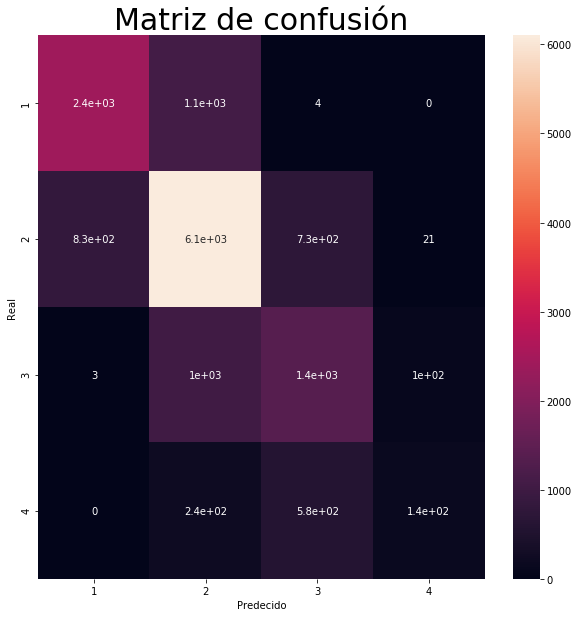

In [16]:
plt.rcParams["figure.figsize"] = (10,10)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predecido'])
sn.heatmap(confusion_matrix, annot=True)
print('Precisión ',metrics.accuracy_score(y_test, y_pred))
plt.title('Matriz de confusión',fontsize=30)
plt.show()

Es obvio que nuestro modelo arroja predicciones muy pobres; no podríamos confiar realmente en éste, por ello, nos vimos en la necesidad de implementar algunas modificaciones en nuestro análisis con el fin de poder mejorar la precisión del modelo.

La mayoría de los datos que se encuentran en la columna representan datos de tipo nominal, por ejemplo, en la columna *tipo_viv* representa el tipo de vivienda sobre la que se capturó la información; los valores posibles dentro de esta columna son los valores numéricos del 1 al 5 en donde:

- 1 - Casa independiente
- 2 - Departamento en edificio
- 3 - Vivienda en vecindad
- 4 - Vivienca en cuarto de azotea
- 5 - Local no construído para habitación

Una vez conociendo esta información, es inútil para nosotros en pensar en un orden lógico para esta columna justo como lo sugiere sus valores numéricos, no podemos pensar que 1 < 2 ya que simplemente no hace sentido y es una amenaza potencial para nuestro algoritmo a aplicar posteriormente. 

In [17]:
# Creo una lista de todas los datos ordinales. Por cuestiones de la forma en que el INEGI guarda los datos, también
# tengo que incluir en la lista todas los nombres de las columnas que representen información binaria (sí, no)
ordinales = ['num_cuarto','cuart_dorm','bano_comp','bano_excus','bano_regad','focos_inca','focos_ahor',
            'renta','estim_pago','pago_viv','tot_resid','tot_hog','cocina','cocina_dor','excusado',
            'uso_compar','estufa_chi','lavadero','fregadero','regadera','tinaco_azo','cisterna','pileta',
            'calent_sol','calent_gas','medidor_luz','bomba_agua','tanque_gas','aire_acond','calefacc','viv_usada']

# Creo una lista con todas las columnas del dataframe
nominales = df.columns.tolist()

# Elimino todos los nombres de columnas nominales de la lista total de columnas
for element in ordinales:
    if element in nominales:
        nominales.remove(element)

In [18]:
# Reemplazo todos los valores nominales pr su significado real 
for i in range (len(nominales)):
    csv = 'Data\\'+nominales[i]+'.csv'
    # Acceso al dataframe que contiene el diccionario de los datos de la respectiva columna
    temp = pd.read_csv(csv,encoding = 'latin')
    for index,row in temp.iterrows():
        # Leo la combinacion de valores de cada diccionario de datos
        numero = temp[nominales[i]][index]
        valor = temp['descripcion'][index]
        df[nominales[i]].replace(numero,valor,inplace=True)

In [19]:
# Dataframe a trabajar
df.head(2)

,mat_pared,mat_techos,cocina,cuart_dorm,num_cuarto,disp_agua,excusado,drenaje,disp_elect,eli_basura,...,calent_gas,medidor_luz,bomba_agua,tanque_gas,aire_acond,calefacc,tot_resid,tot_hog,tam_loc,est_socio
0,"Tabique, ladrillo, block, piedra, cantera, cem...",Losa de concreto o viguetas con bovedilla,1,4,6,Agua entubada dentro de la vivienda,1,La red pública,Del servicio público,La tiran en un contenedor o depósito,...,1,1,1,2,2,2,3,1,Localidades con 100 000 y más habitantes,Medio alto
1,"Tabique, ladrillo, block, piedra, cantera, cem...",Losa de concreto o viguetas con bovedilla,1,5,6,Agua entubada dentro de la vivienda,1,La red pública,Del servicio público,La tiran en un contenedor o depósito,...,1,1,1,2,2,2,5,1,Localidades con 100 000 y más habitantes,Medio alto


Ahora, para poder presentar de manera cuantitativa esa información sin caer en la falacia de como era presentado el dataframe originalmente, convertimos nuestras columnas nominales a un conjunto de columnas dummy

In [20]:
# Creo un dataframe con todas las características dummy
dummy = pd.get_dummies(df[nominales[:-1]])
#dummy_1 = pd.get_dummies(df[si_no])
# Elimino las columnas "originales" exceptuando columa de resultados. La razón es que crearía redundancia con los dummies
df.drop(nominales[:-1],axis=1,inplace=True)
#df.drop(si_no,axis=1,inplace=True)
# Hago un merge con mi dataframe original 
df = df.merge(dummy,left_index=True,right_index=True)
#df = df.merge(dummy_1,left_index=True,right_index=True)

In [21]:
# Dataframe listo para utilizarse 
df.head()

,cocina,cuart_dorm,num_cuarto,excusado,lavadero,fregadero,regadera,tinaco_azo,cisterna,pileta,...,eli_basura_La recoge un camión o carrito de basura,"eli_basura_La tiran al río, lago o mar",eli_basura_La tiran en barranca o grieta,eli_basura_La tiran en el basurero público,eli_basura_La tiran en un contenedor o depósito,eli_basura_La tiran en un terreno baldío o calle,tam_loc_Localidades con 100 000 y más habitantes,tam_loc_Localidades con 15 000 a 99 999 habitantes,tam_loc_Localidades con 2 500 a 14 999 habitantes,tam_loc_Localidades con menos de 2 500 habitantes
0,1,4,6,1,1,1,1,1,1,2,...,0,0,0,0,1,0,1,0,0,0
1,1,5,6,1,1,1,1,1,1,2,...,0,0,0,0,1,0,1,0,0,0
2,1,2,7,1,1,1,1,1,1,2,...,0,0,0,0,1,0,1,0,0,0
3,1,2,5,1,1,1,1,1,1,2,...,0,0,0,0,1,0,1,0,0,0
4,1,3,4,1,1,1,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0


In [22]:
# Resultados
y = df.est_socio
# Variables 
x = df
x = x.drop('est_socio',axis=1)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.01)

In [24]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

Precisión  0.7006802721088435


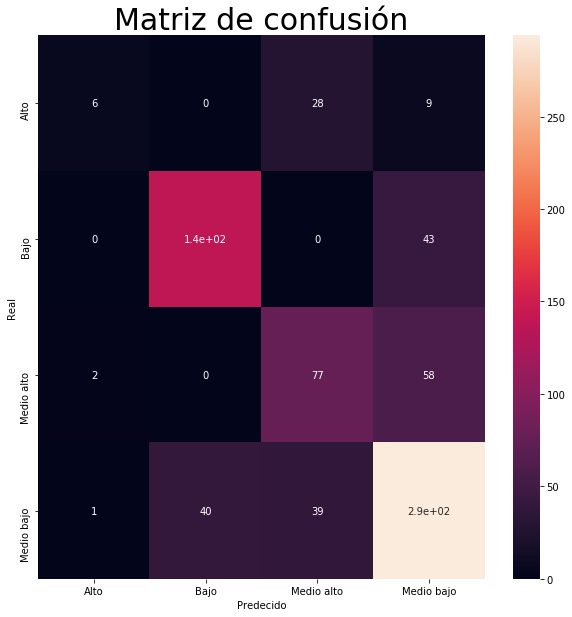

In [25]:
plt.rcParams["figure.figsize"] = (10,10)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predecido'])
sn.heatmap(confusion_matrix, annot=True)
print('Precisión ',metrics.accuracy_score(y_test, y_pred))
plt.title('Matriz de confusión',fontsize=30)
plt.show()